**Reading Files and Converting it into Dataframe**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving neg.txt to neg (1).txt
Saving pos.txt to pos (1).txt


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import io
from pprint import pprint

In [0]:
with open('pos.txt','r') as file:
  pos=file.read()

In [0]:
pos=pd.read_csv("pos.txt",sep='\t',header=None)

In [0]:
pos.drop(1,axis=1)

,0
0,@modamouth LOL i graduated !!
1,my diploma get sent tomorrow !!!! University o...
2,i graduate this year !!!!! YESS !!! Thank you God
3,I graduated today !!
4,I am now an official graduate of the Universit...
5,Defending my Thesis went great ! graduated wit...
6,Done with BSc . Software Engineering ! Just fi...
7,I am officially a college graduate !
8,Getting myself cute for my graduation tomorrow
9,Holy Fuck I just graduated high school !


In [0]:
pos['tweets']=pos[0]

In [0]:
pos.drop([0,1],axis=1)

,tweets
0,@modamouth LOL i graduated !!
1,my diploma get sent tomorrow !!!! University o...
2,i graduate this year !!!!! YESS !!! Thank you God
3,I graduated today !!
4,I am now an official graduate of the Universit...
5,Defending my Thesis went great ! graduated wit...
6,Done with BSc . Software Engineering ! Just fi...
7,I am officially a college graduate !
8,Getting myself cute for my graduation tomorrow
9,Holy Fuck I just graduated high school !


In [0]:
pos['sentiment']='pos'

In [0]:
pos=pos.drop([0,1],axis=1)

In [0]:
pos

,tweets,sentiment
0,@modamouth LOL i graduated !!,pos
1,my diploma get sent tomorrow !!!! University o...,pos
2,i graduate this year !!!!! YESS !!! Thank you God,pos
3,I graduated today !!,pos
4,I am now an official graduate of the Universit...,pos
5,Defending my Thesis went great ! graduated wit...,pos
6,Done with BSc . Software Engineering ! Just fi...,pos
7,I am officially a college graduate !,pos
8,Getting myself cute for my graduation tomorrow,pos
9,Holy Fuck I just graduated high school !,pos


In [0]:
with open('neg.txt','r') as f:
  neg=f.readlines()

In [0]:
neg=pd.DataFrame(neg)

In [0]:
neg['tweets']=neg[0]
neg=neg.drop(0,axis=1)
neg['sentiment']='neg'

In [0]:
neg.head()

,tweets,sentiment
0,RT @politico: A new poll finds a majority of A...,neg
1,RT @KhadimDurrani: 17-year-old #Pakistan gang-...,neg
2,@AJEnglish: Why is a Thai Muslim separatist mo...,neg
3,RT @CEMB_forum: 18 year old twin sisters named...,neg
4,RT @hrw: Top Tweets of the Week: #BerkinElvan;...,neg


In [0]:
df=pd.concat([pos,neg])

In [0]:
df.head()

,tweets,sentiment
0,@modamouth LOL i graduated !!,pos
1,my diploma get sent tomorrow !!!! University o...,pos
2,i graduate this year !!!!! YESS !!! Thank you God,pos
3,I graduated today !!,pos
4,I am now an official graduate of the Universit...,pos


In [0]:
df.tail()

,tweets,sentiment
200497,High flying cam causing privacy outrage http:/...,neg
200498,The desperate struggle at the heart of the bru...,neg
200499,RT @GoogleforWork: Exclusive event: Join Googl...,neg
200500,- http://t.co/n1w88oLMbU\n,neg
200501,How hidden billions flow through Luxembourg ht...,neg


In [0]:
df.shape

(201273, 2)

**Lower Case**

In [0]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
df.head()

,tweets,sentiment
0,@modamouth lol i graduated !!,pos
1,my diploma get sent tomorrow !!!! university o...,pos
2,i graduate this year !!!!! yess !!! thank you god,pos
3,i graduated today !!,pos
4,i am now an official graduate of the universit...,pos


**Removing Punctuation**

In [0]:
df['tweets'] = df['tweets'].str.replace('[^\w\s]','')

In [0]:
df.head()

,tweets,sentiment
0,modamouth lol i graduated,pos
1,my diploma get sent tomorrow university of ri...,pos
2,i graduate this year yess thank you god,pos
3,i graduated today,pos
4,i am now an official graduate of the universit...,pos


**Stop Words Removal**

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###Word Cloud (Extra Work)

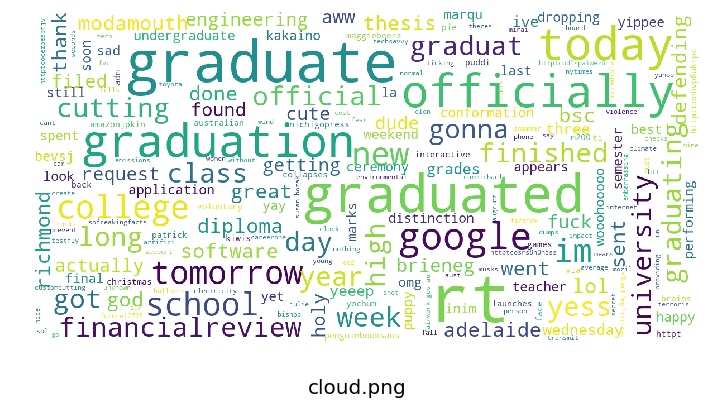

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
data=df['tweets']
title='cloud.png'
wordcloud = WordCloud(background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
if title:
  fig.suptitle(title, fontsize=20)
  fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud)
plt.show()

###Detecting Positive and Negative Event Tweets

In [0]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['tweets']), axis=1)

In [0]:
from textblob import Word
nltk.download('wordnet')
df['lemmatized_tokens'] = df['tokenized_sents'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
x=df['lemmatized_tokens']
y=df['sentiment']

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(xTrain)
test_vect=tfidf.fit_transform(xTest)

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_vect.toarray(), yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred=model.predict(test_vect.toarray())

In [0]:
from sklearn.metrics import confusion_matrix,f1_score
c=confusion_matrix(yTest,pred)

In [0]:
f1_score(yTest,pred, average="binary", pos_label="neg")

0.9294932633203536

### Detect different types of Event Category

In [0]:
uploaded2=files.upload()

Saving Categories.xlsx to Categories.xlsx


In [0]:
cat=pd.read_excel('Categories.xlsx')

In [0]:
cat

,Label,Keywords
0,Wedding &engagement,"wedding, love, ring, engagement, engaged, brid..."
1,Relationship Begin,"boyfriend, girlfriend, date, check, relationsh..."
2,Anniversary,"anniversary, years, year, married, celebrating..."
3,Relation End/ Devorce,"relationship, ended, hurt, hate, devorce, bles..."
4,Graduation,"graduation, school, college, graduate, graduat..."
5,Admission,"admitted, university, admission, accepted, col..."
6,Exam,"passed, exam, test, school, semester, finishe..."
7,Research,"research, presentation, journalism, paper, con..."
8,Essay & Thesis,"essay, thesis, reading, statement, dissertatio..."
9,Job,"job, accepted,announce, join, joining, offer, ..."


In [0]:
cat['lemmatized_tokens'] = cat['Keywords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

In [0]:
x=cat['Keywords']
y=cat['Label']
x_pred=df['lemmatized_tokens']

In [0]:
tfidf = TfidfVectorizer(max_features=220, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
x_train = tfidf.fit_transform(x)
pred_vec=tfidf.fit_transform(x_pred)

In [0]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train.toarray(), y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
 pred=model2.predict(pred_vec.toarray())
#x_train.shape

In [0]:
print(pred)

['Lawsuit' 'Acting' 'Give Birth' ... 'Vacation ' 'Acting' 'Acting']
